#    

In [39]:
%reset -f

In [144]:
import random
from math import sqrt, sin, cos, exp, pow, pi, log
import handcalcs.render
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

# Завдання 1

Сформувати 100 випадкових чисел з рівномірним розподілом з інтервалу [5; 10]. Побудувати графік функції щільності, розрахувати математичне очікування та середньоквадратичне відхилення. Розрахунки виконати за вищенаведеними математичними формулами, а також з використанням вбудованих функцій математичного пакету.

Figure(432x288)


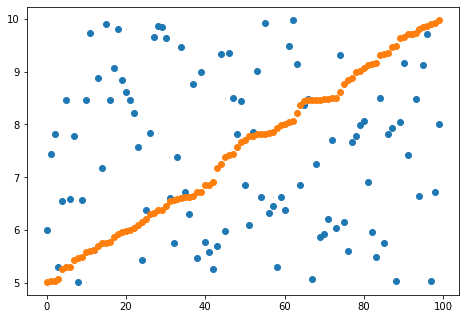

<Figure size 432x288 with 0 Axes>

In [121]:
class data:
    def __init__(self, _X, _Y, _title, _color='tab:orange'):
        self.X = _X; self.Y = _Y; self.title = _title; self.color = _color
def prePlot():
    fig = plt.figure()
    ax=fig.add_axes([0,0,1,1])
def plotHist(item):
    plt.twinx().hist(item.X, item.Y, label=item.title, color=item.color)
def plotLine(item):
    plt.plot(item.X, item.Y, label=item.title, linestyle = 'solid', marker = 'None', color=item.color)
def plotPoint(item):
    plt.plot(item.X, item.Y, label=item.title, linestyle = 'none', marker = 'o', color=item.color)
def postPlot():
    ax.legend()
    print(fig)
    plt.figure().clear()

a = 5
b = 10
N = 100
i = range(N)
X = [a + (b - a) * np.random.rand()  for _ in i]

prePlot()
plotPoint(data(i, X,'Вибірка','tab:blue')); X.sort()
plotPoint(data(i, X,'Вибірка')); postPlot()

Figure(432x288)


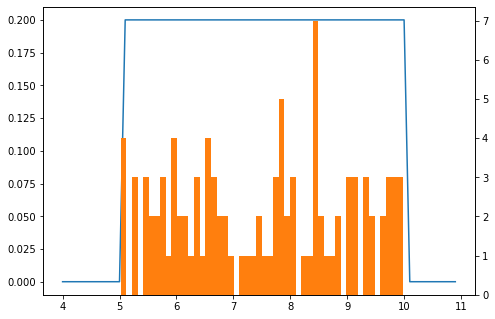

<Figure size 432x288 with 0 Axes>

In [122]:
fXab = []
Xaxis = np.arange(4, 11, 0.1)
for x in Xaxis:
    if x >= a and x <= b:
        toAppend = 1 / (b - a)
    else:
        toAppend = 0
    fXab.append(toAppend)

prePlot()
plotLine(data(Xaxis,fXab,'Імовірність','tab:blue'))
plotHist(data(X, int(N/2),'Частоти')); postPlot()

Математичне очікування

In [147]:
# %%render # Short
print("M_x = ", (a+b)/2)
print("x_avg = ", sum(X)/len(X))

M_x =  7.5
x_avg =  1.9278209566089684


Cередньоквадратичне відхилення

In [124]:
%%render # Short
print("s = ", (b-a)/(2*sqrt(3)))

s =  1.4433756729740645


# Завдання 2

Сформувати 100 випадкових чисел з нормальним розподілом з математичним очікуванням M = 7 та середньоквадратичним відхиленням σ = 0,5. Побудувати графік функції щільності. Для генерації випадкових чисел використати вбудовану функцію математичного пакету.

Figure(432x288)


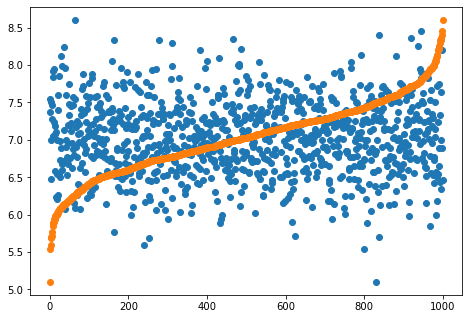

<Figure size 432x288 with 0 Axes>

In [125]:
m = 7
s = 0.5
N = 1000
i = range(N)
X = np.random.normal(m, s, N)

prePlot()
plotPoint(data(i,X,'вибірка','tab:blue')); X.sort()
plotPoint(data(i,X,'сортування')); postPlot()

Figure(432x288)


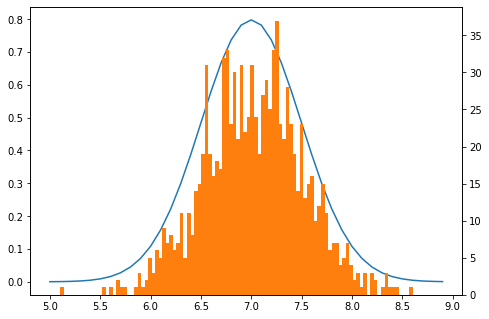

<Figure size 432x288 with 0 Axes>

In [126]:
fXab = []
Xaxis = np.arange(5, 9, 0.1)
for x in Xaxis:
    fXab.append(1/(s*sqrt(2*pi))
                *exp(-pow(x-m,2)/(2*pow(s,2))))

prePlot()
plotLine(data(Xaxis,fXab,'Імовірність','tab:blue'))
plotHist(data(X,int(N/10),'Вибірка')); postPlot()

# Завдання 3

Сформувати 100 випадкових чисел у відповідності з нормальним законом з використанням метода Боксу-Мюллера, метода Марсал'ї-Брея та за допомогою центральної граничної теореми. Побудувати графік функції щільності. Виконати нормалізацію даних. Обчислити математичне очікування та середньоквадратичне відхилення.

###  Метод Боксу-Мюллера

Figure(432x288)
Figure(432x288)


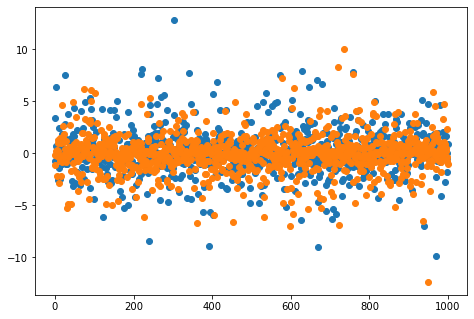

<Figure size 432x288 with 0 Axes>

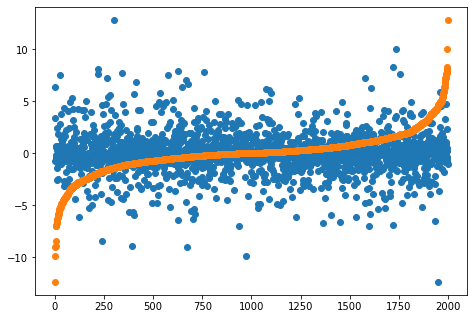

<Figure size 432x288 with 0 Axes>

In [127]:
N = 1000
i = range(N)
X1 = [-2*log(np.random.rand())*cos(2*pi*np.random.rand()) for _ in i]
X2 = [-2*log(np.random.rand())*sin(2*pi*np.random.rand()) for _ in i]

prePlot()
plotPoint(data(i, X1,'вибірка1','tab:blue'))
plotPoint(data(i, X2,'вибірка2')); postPlot()

N*=2
i = range(N)
X = X1 + X2

prePlot()
plotPoint(data(i, X,'вибірка','tab:blue')); X.sort()
plotPoint(data(i, X,'сортування')); postPlot()

Математичне очікування. Середньоквадратичне відхилення

In [128]:
m = sum(X)/N; print("m = ", m) # long
s = sqrt(sum([(x - m)**2 for x in X]) / (len(X) - 1)); print("s = ", s)

m =  0.04666084435758356
s =  1.9742333164273909


Нормалізація

In [129]:
zn = [(x-m)/s for x in X]
mn = sum(zn)/len(zn); print("mn = ", mn)
sn = sqrt(sum([(znj-mn)**2 for znj in zn])/(len(zn)-1)); print("sn = ", sn)

mn =  3.228528555609955e-16
sn =  0.9999999999999991


Figure(432x288)
Figure(432x288)


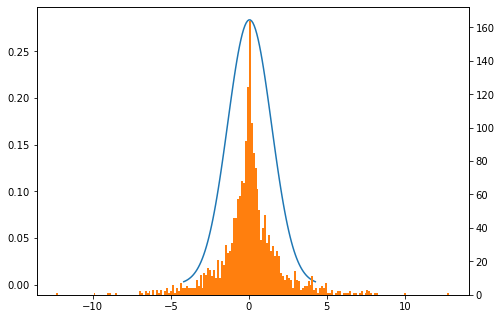

<Figure size 432x288 with 0 Axes>

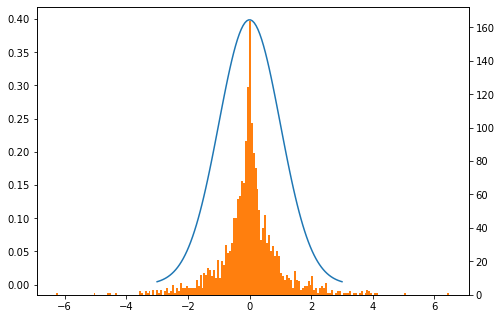

<Figure size 432x288 with 0 Axes>

In [130]:
x_3s = np.linspace(m - 3*sqrt(s), m + 3*sqrt(s), 100)

prePlot()
plotLine(data(x_3s, stats.norm.pdf(x_3s, m, sqrt(s)),'Імовірність','tab:blue'))
plotHist(data(X, int(N/10),'Вибірка')); postPlot()

X = zn
m = mn
s = sn
x_3s = np.linspace(m - 3*sqrt(s), m + 3*sqrt(s), 100)

prePlot()
plotLine(data(x_3s, stats.norm.pdf(x_3s, m, sqrt(s)),'Імовірність','tab:blue'))
plotHist(data(X, int(N/10),'Вибірка')); postPlot()

### Метод Марсал'ї-Брея

Figure(432x288)
Figure(432x288)


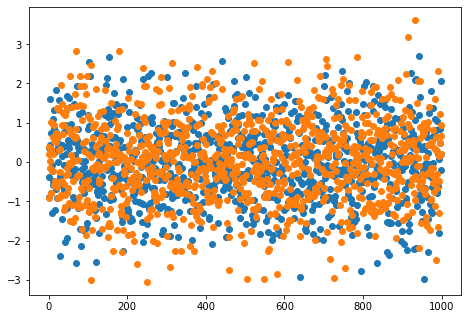

<Figure size 432x288 with 0 Axes>

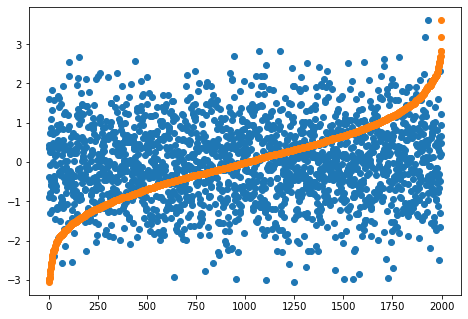

<Figure size 432x288 with 0 Axes>

In [131]:
def MarsaliiBrey(container1, container2, i):
    i = range(N)
    for _ in i:
        V1 = -1 + 2 * np.random.rand()
        V2 = -1 + 2 * np.random.rand()
        S = (V1 ** 2) + (V2 ** 2)
        while S >= 1:
            V1 = -1 + 2 * np.random.rand()
            V2 = -1 + 2 * np.random.rand()
            S = (V1 ** 2) + (V2 ** 2)
        constant = sqrt(-2*log(S)/S);
        container1.append(V1 * constant)
        container2.append(V2 * constant)

N = 1000
i = range(1000)
X1 = []
X2 = []
MarsaliiBrey(X1, X2, i)

prePlot()
plotPoint(data(i, X1,'вибірка1','tab:blue'))
plotPoint(data(i, X2,'вибірка2')); postPlot()

N *= 2
i = range(N)
X = X1 + X2

prePlot()
plotPoint(data(i, X,'вибірка','tab:blue')); X.sort()
plotPoint(data(i, X,'сортування')); postPlot()

Математичне очікування. Середньоквадратичне відхилення

In [132]:
m = sum(X)/N; print("m = ", m)
s = sqrt(sum([(x - m)**2 for x in X]) / (len(X) - 1)); print("s = ", s)

m =  -0.011629800036034954
s =  1.0155789957705257


Нормалізація

In [133]:
zn = [(x-m)/s for x in X]
mn = sum(zn)/len(zn); print("mn = ", mn)
sn = sqrt(sum([(znj-mn)**2 for znj in zn])/(len(zn)-1)); print("sn = ", sn)

mn =  -1.3289369604763124e-15
sn =  1.0000000000000009


Figure(432x288)
Figure(432x288)


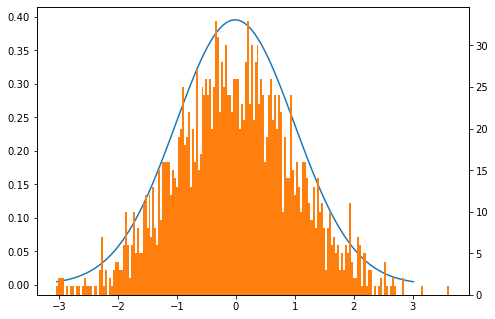

<Figure size 432x288 with 0 Axes>

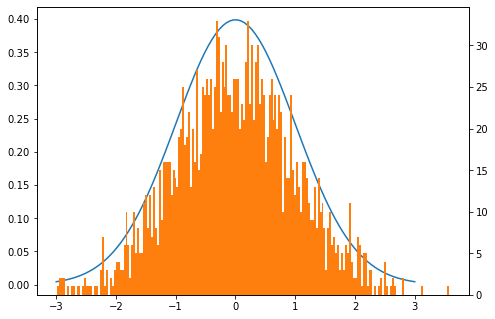

<Figure size 432x288 with 0 Axes>

In [134]:
x_3s = np.linspace(m - 3*sqrt(s), m + 3*sqrt(s), 100)

prePlot()
plotLine(data(x_3s, stats.norm.pdf(x_3s, m, sqrt(s)),'Імовірність','tab:blue'))
plotHist(data(X, int(N/10),'вибірка')); postPlot()

X = zn
m = mn
s = sn
x_3s = np.linspace(m - 3*sqrt(s), m + 3*sqrt(s), 100)

prePlot()
plotLine(data(x_3s, stats.norm.pdf(x_3s, m, sqrt(s)),'Імовірність','tab:blue'))
plotHist(data(X, int(N/10),'вибірка')); postPlot()

### Метод центральної граничної теореми

Figure(432x288)


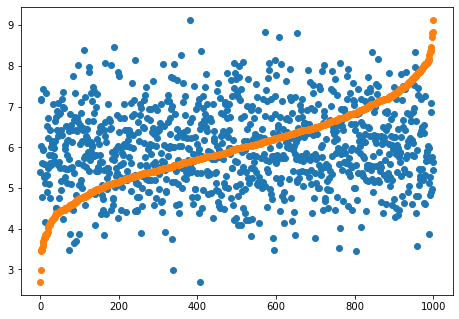

<Figure size 432x288 with 0 Axes>

In [135]:
def CentralLimitTheorem(container, i):
    for _ in i:
        elem = 0
        for _ in range(12):
            elem += np.random.rand()
        container.append(elem)

N = 1000
i = range(N)
X = []
CentralLimitTheorem(X, i)

prePlot()
plotPoint(data(i, X,'вибірка','tab:blue')); X.sort()
plotPoint(data(i, X,'сортування')); postPlot()

Математичне очікування. Середньоквадратичне відхилення

In [136]:
m = sum(X)/N; print("m = ", m)
s = sqrt(sum([(x - m)**2 for x in X]) / (len(X) - 1)); print("s = ", s)

m =  5.987920573305867
s =  0.9933632081702898


Нормалізація

In [137]:
zn = [(x-m)/s for x in X]
mn = sum(zn)/len(zn); print("mn = ", mn)
sn = sqrt(sum([(znj-mn)**2 for znj in zn])/(len(zn)-1)); print("sn = ", sn)

mn =  -2.5224267119483554e-16
sn =  0.9999999999999997


Figure(432x288)
Figure(432x288)


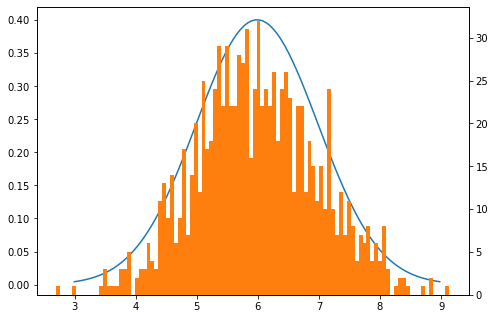

<Figure size 432x288 with 0 Axes>

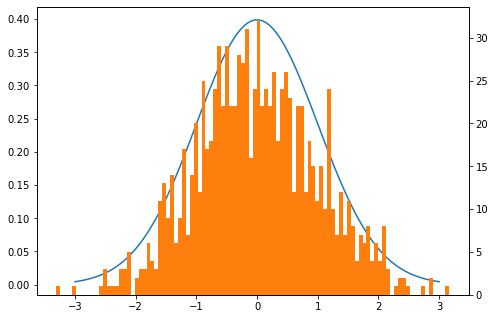

<Figure size 432x288 with 0 Axes>

In [138]:
x_3s = np.linspace(m - 3*sqrt(s), m + 3*sqrt(s), 100)

prePlot()
plotLine(data(x_3s, stats.norm.pdf(x_3s, m, sqrt(s)),'Імовірність','tab:blue'))
plotHist(data(X, int(N/10),'вибірка')); postPlot()

X = zn
m = mn
s = sn
x_3s = np.linspace(m - 3*sqrt(s), m + 3*sqrt(s), 100)

prePlot()
plotLine(data(x_3s, stats.norm.pdf(x_3s, m, sqrt(s)),'Імовірність','tab:blue'))
plotHist(data(X, int(N/10),'вибірка')); postPlot()

# Завдання 4

Сформувати 100 випадкових чисел з показовим розподілом при λ = 0,5. Побудувати графік функції щільності, розрахувати математичне очікування та середньоквадратичне відхилення. Розрахунки виконати за вищенаведеними математичними формулами, а також з використанням вбудованих функцій математичного пакету.

Figure(432x288)


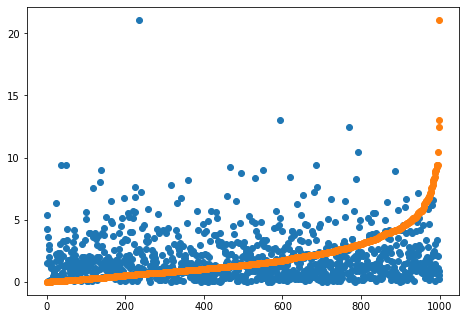

<Figure size 432x288 with 0 Axes>

In [139]:
L = 0.5
N = 1000
i = range(N)
X = np.random.exponential(1/L, N)

prePlot()
plotPoint(data(i, X,'вибірка','tab:blue')); X.sort()
plotPoint(data(i, X,'сортування')); postPlot()

Figure(432x288)


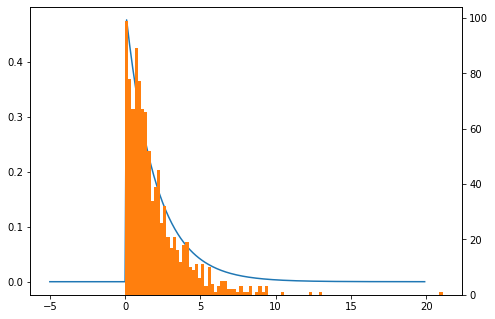

<Figure size 432x288 with 0 Axes>

In [140]:
fXab = []
Xaxis = np.arange(-5, 20, 0.1)
for x in Xaxis:
    if x >= 0:
        toAppend = L*exp(-L*x)
    else:
        toAppend = 0
    fXab.append(toAppend)

prePlot()
plotLine(data(Xaxis, fXab,'Імовірність','tab:blue'))
plotHist(data(X, int(N/10),'сортування')); postPlot()

### Математичне очікування

In [141]:
1/L

2.0

### Середньоквадратичне відхилення

In [142]:
1/L

2.0